<img src='./KT.jpg' height=500px>
<img src='./feedback.jpg' height=500px>

# Анализ данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
dataset = "./wb_school_task_2.csv.gzip"
dataframe = pd.read_csv(dataset, compression='gzip')

In [3]:
dataframe = dataframe.drop_duplicates()

In [4]:
dataframe.shape

(3122, 13)

In [5]:
dataframe.head()

,id1,id2,id3,text,f1,f2,f3,f4,f5,f6,f7,f8,label
0,7596126584852021591,173777575861152844,18254136755182295358,"Хотела купить на замену старых,по итогу эти у...",1,1,1.0,11,13,4.272727,18,36,0
1,5327406586753254371,14366783259208998381,2324030737335224220,Запах по сравнению с обычным DOVE никакой. Оно...,10,6,2.7,46,4,4.434783,90,109,1
2,2636757786779776109,16985421652518589249,4904562693381133981,"Кабель подошёл, хорошо работает.",4,4,4.0,14,0,4.500000,4,6,0
3,15432976385014516263,2629180387521298831,13541353053200353836,"Восторг! Очень приятный аромат, держится долго...",6,6,5.0,374,30,4.772727,14,15,1
4,11933982800034911890,14531191561111600318,9121890650636487522,Визуально все хорошо. Не пробовали. Купили в п...,19,18,5.0,6,4,5.000000,26,33,0


In [6]:
dataframe.isna().sum()

id1      0
id2      0
id3      0
text     0
f1       0
f2       0
f3       0
f4       0
f5       0
f6       0
f7       0
f8       0
label    0
dtype: int64

In [7]:
dataframe.loc[:, "id1":"id3"] = dataframe.loc[:, "id1":"id3"].astype('category')
dataframe.dtypes

id1      category
id2      category
id3      category
text       object
f1          int64
f2          int64
f3        float64
f4          int64
f5          int64
f6        float64
f7          int64
f8          int64
label       int64
dtype: object

In [8]:
dataframe.loc[:, 'f1':'f8'].describe()

,f1,f2,f3,f4,f5,f6,f7,f8
count,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000
mean,19.375400,16.193786,4.232476,808.859385,216.696989,4.453270,48.103459,94.272902
std,35.700362,26.043476,1.180144,2509.711329,802.273584,0.619517,67.055156,329.545112
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,2.000000,2.000000,4.076923,26.000000,6.000000,4.330943,8.000000,13.000000
50%,8.000000,7.000000,4.764706,116.000000,26.000000,4.617812,30.000000,45.000000
75%,23.000000,20.000000,5.000000,493.500000,110.500000,4.809509,65.000000,106.750000
max,638.000000,550.000000,5.000000,35375.000000,15683.000000,5.000000,1058.000000,9243.000000


Cбалансированность классов

In [9]:
print(
    '1:', sum(dataframe['label']==1),
    '\n0:', sum(dataframe['label']==0)
)

1: 825 
0: 2297


Произведем пересэмплирование

Классы несбалансированы

Корреляция числовых параметов

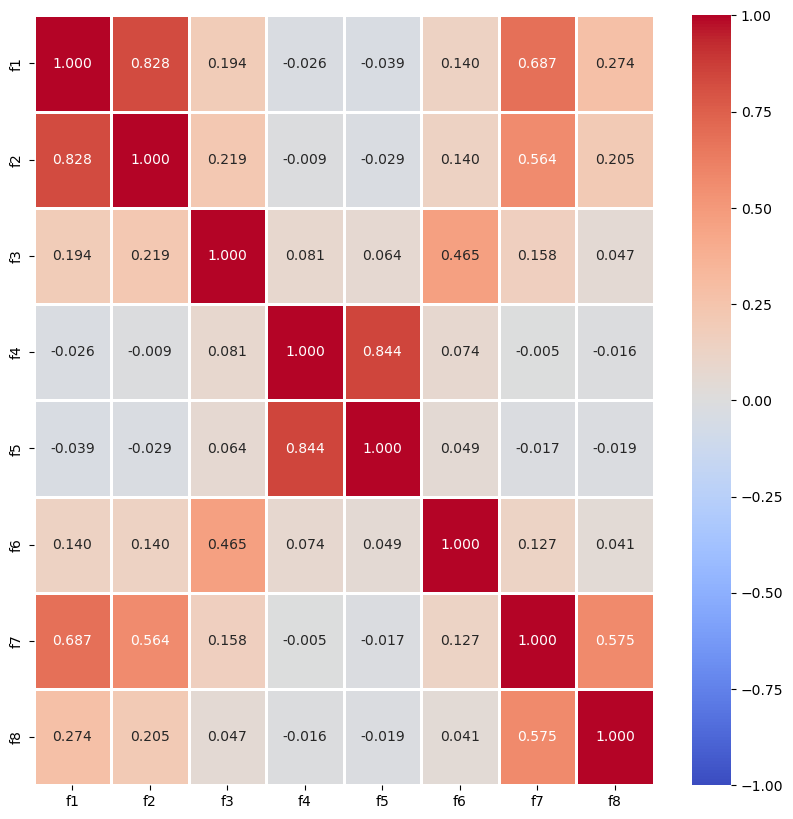

In [237]:
import seaborn as sns
from seaborn import palettes

import matplotlib.pyplot as plt

def correlation_map(data, column_names):
    f, ax = plt.subplots(figsize=(10, 10))  # размер ячейки
    sns.heatmap(data[column_names].corr(), 
                cmap = sns.color_palette("coolwarm", as_cmap=True),
                vmin=-1, vmax=1,
                annot=True, linewidths=.8, fmt= '.3f') # отобр-ть числа, ширина 8, 3 знака после запятой
    return plt

correlation_map(dataframe, (f'f{i+1}' for i in range(8)))

plt.show()

Вывод: у f1-f2 и f4-f5 высокая корреляция. В дальшейшем надо будет отбросить из каждой пары выбрать один признак и выкинуть его из таблицы.

In [12]:
# отбросим линейно зависимые параметры
num_columns = ['f1', 'f3', 'f5', 'f6', 'f7', 'f8']
dataframe_droped = dataframe.drop(['f2', 'f4'], axis=1)
dataframe_droped

,id1,id2,id3,text,f1,f3,f5,f6,f7,f8,label
0,7596126584852021591,173777575861152844,18254136755182295358,"Хотела купить на замену старых,по итогу эти у...",1,1.000000,13,4.272727,18,36,0
1,5327406586753254371,14366783259208998381,2324030737335224220,Запах по сравнению с обычным DOVE никакой. Оно...,10,2.700000,4,4.434783,90,109,1
2,2636757786779776109,16985421652518589249,4904562693381133981,"Кабель подошёл, хорошо работает.",4,4.000000,0,4.500000,4,6,0
3,15432976385014516263,2629180387521298831,13541353053200353836,"Восторг! Очень приятный аромат, держится долго...",6,5.000000,30,4.772727,14,15,1
4,11933982800034911890,14531191561111600318,9121890650636487522,Визуально все хорошо. Не пробовали. Купили в п...,19,5.000000,4,5.000000,26,33,0
...,...,...,...,...,...,...,...,...,...,...,...
3118,764513678578182418,15635360211325277203,6836784353719029392,"Стекло не плохое,но есть один минус на техно с...",2,3.000000,1,4.263158,9,9,0
3119,6838893897482150395,13016265854619171030,12090430373311552618,"Всё пришло запаковано, ничего не сломано. Лучш...",8,4.375000,83,4.183206,18,18,0
3120,3080528623596565085,17787644417937804433,18003133089489520237,"Мне нравятся 👍🏻 я очень аллергичная, посоветов...",13,5.000000,2,4.944828,12,14,0
3121,13059704988549832630,997055248102065549,12214993272083833542,"Спасибо, целая пришла. Хорошо упаковано",3,5.000000,19,4.648780,103,155,0


## Общий анализ

f3 и f6 имеют значения от 1 до 5. Скорее всего, это оценки (товара и комментария)

Остальные значения могут быть количеством проданных товаров, количеством отзывов, ценой товара или количеством лайков/дизлайков у комментария и т.д.

Вывод: у id1 наименьшая условная энтропия. Это значит, что для строк таблицы с одинаковым значением id1 будет заметно преобладание какого-либо класса. Возможно, id1 – это id пользователя 

## Анализ текста

In [13]:
dataframe_droped.loc[:10, 'text':]

,text,f1,f3,f5,f6,f7,f8,label
0,"Хотела купить на замену старых,по итогу эти у...",1,1.0,13,4.272727,18,36,0
1,Запах по сравнению с обычным DOVE никакой. Оно...,10,2.7,4,4.434783,90,109,1
2,"Кабель подошёл, хорошо работает.",4,4.0,0,4.500000,4,6,0
3,"Восторг! Очень приятный аромат, держится долго...",6,5.0,30,4.772727,14,15,1
4,Визуально все хорошо. Не пробовали. Купили в п...,19,5.0,4,5.000000,26,33,0
5,"Коробка в состоянии,, прошла Афган,,! Гладкая ...",1,3.0,4,3.500000,0,3,0
6,Джинсы хорошие качество отличное но дороговаты...,2,3.0,34,4.225434,1,7,0
7,Хорошее качество,5,5.0,1,4.600000,8,8,1
8,"Камеры не закрывает, камеры в ровень с чехлом",1,1.0,90,4.657143,2,2,0
9,Юлия не могли бы Вы проверить стеганку которую...,1,5.0,90,4.715134,0,1,0


Исходя из наблюдений того, что негативные комментарии имеют меньшее значение f3, можно сделать вывод, что f3 – это оценка комментария

Выделим фичи из текстов отзывов

In [18]:
import re

def extract_features(s: pd.Series):
    text = s['text']
    word_count = len(re.findall(r'[а-яА-Яa-zA-Z]+', text))
    # есть отзывы, состоящие из смайликов, пробелов или нижних подчеркиваний
    if word_count == 0:
            return pd.Series({
            'id1': s['id1'],
            'id2': s['id2'],
            'id3': s['id3'],
            'text': text,
            'label': s['label'],
            'text_len': len(text),
            'words_count': 0,
            'sentence_count': 0,
            'number_percentage': 0,
            'caps_percentage': 0,
            'is_empty': 1
        })

    return pd.Series({
        'id1': s['id1'],
        'id2': s['id2'],
        'id3': s['id3'],
        'text': text,
        'label': s['label'],
        'text_len': len(text),
        'words_count': word_count,
        'sentence_count': len(re.split(r'[.!?]+', text)),
        'number_percentage': len(re.findall(r'\d+', text)) / word_count,
        'caps_percentage': len(re.findall(r'[А-ЯA-Z]+', text)) / word_count,
        'is_empty': 0
    })

text_features = dataframe_droped.apply(extract_features, axis=1)
text_features

,id1,id2,id3,text,label,text_len,words_count,sentence_count,number_percentage,caps_percentage,is_empty
0,7596126584852021591,173777575861152844,18254136755182295358,"Хотела купить на замену старых,по итогу эти у...",0,96,16,2,0.000000,0.062500,0
1,5327406586753254371,14366783259208998381,2324030737335224220,Запах по сравнению с обычным DOVE никакой. Оно...,1,99,15,3,0.000000,0.266667,0
2,2636757786779776109,16985421652518589249,4904562693381133981,"Кабель подошёл, хорошо работает.",0,32,5,2,0.000000,0.200000,0
3,15432976385014516263,2629180387521298831,13541353053200353836,"Восторг! Очень приятный аромат, держится долго...",1,81,11,3,0.000000,0.181818,0
4,11933982800034911890,14531191561111600318,9121890650636487522,Визуально все хорошо. Не пробовали. Купили в п...,0,52,8,3,0.000000,0.375000,0
...,...,...,...,...,...,...,...,...,...,...,...
3118,764513678578182418,15635360211325277203,6836784353719029392,"Стекло не плохое,но есть один минус на техно с...",0,66,13,2,0.076923,0.076923,0
3119,6838893897482150395,13016265854619171030,12090430373311552618,"Всё пришло запаковано, ничего не сломано. Лучш...",0,63,10,2,0.000000,0.200000,0
3120,3080528623596565085,17787644417937804433,18003133089489520237,"Мне нравятся 👍🏻 я очень аллергичная, посоветов...",0,101,13,1,0.000000,0.076923,0
3121,13059704988549832630,997055248102065549,12214993272083833542,"Спасибо, целая пришла. Хорошо упаковано",0,40,5,2,0.000000,0.400000,0


In [19]:
text_features[text_features['is_empty']==1]

,id1,id2,id3,text,label,text_len,words_count,sentence_count,number_percentage,caps_percentage,is_empty
23,14932418852539196783,11594206611029735520,5576082564072164535,︎ ︎ ︎ ︎ ︎ ︎,1,11,0,0,0.0,0.0,1
408,7228372016730991648,5850695483357674592,8160404367092487937,__________,1,10,0,0,0.0,0.0,1
637,14533498944280804100,11860455876991826814,15053676552810216566,👍👍👍👍👍👍,0,6,0,0,0.0,0.0,1
1218,18020901957991569865,11775626371433002033,17776117386538683712,👌👍🏼👍🏼👍🏼👍🏼,0,9,0,0,0.0,0.0,1
2299,1245898986917320135,6855420157049629570,11327471499625535952,👍👍👍👍👍👍👍👍👍👍,1,10,0,0,0.0,0.0,1


In [20]:
dataframe_droped.shape, text_features.shape

((3122, 11), (3122, 11))

In [21]:
merged_dataset = pd.merge(dataframe_droped, text_features, on=['text', 'label', 'id1', 'id2', 'id3'], how='left')
merged_dataset

,id1,id2,id3,text,f1,f3,f5,f6,f7,f8,label,text_len,words_count,sentence_count,number_percentage,caps_percentage,is_empty
0,7596126584852021591,173777575861152844,18254136755182295358,"Хотела купить на замену старых,по итогу эти у...",1,1.000000,13,4.272727,18,36,0,96,16,2,0.000000,0.062500,0
1,5327406586753254371,14366783259208998381,2324030737335224220,Запах по сравнению с обычным DOVE никакой. Оно...,10,2.700000,4,4.434783,90,109,1,99,15,3,0.000000,0.266667,0
2,2636757786779776109,16985421652518589249,4904562693381133981,"Кабель подошёл, хорошо работает.",4,4.000000,0,4.500000,4,6,0,32,5,2,0.000000,0.200000,0
3,15432976385014516263,2629180387521298831,13541353053200353836,"Восторг! Очень приятный аромат, держится долго...",6,5.000000,30,4.772727,14,15,1,81,11,3,0.000000,0.181818,0
4,11933982800034911890,14531191561111600318,9121890650636487522,Визуально все хорошо. Не пробовали. Купили в п...,19,5.000000,4,5.000000,26,33,0,52,8,3,0.000000,0.375000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,764513678578182418,15635360211325277203,6836784353719029392,"Стекло не плохое,но есть один минус на техно с...",2,3.000000,1,4.263158,9,9,0,66,13,2,0.076923,0.076923,0
3118,6838893897482150395,13016265854619171030,12090430373311552618,"Всё пришло запаковано, ничего не сломано. Лучш...",8,4.375000,83,4.183206,18,18,0,63,10,2,0.000000,0.200000,0
3119,3080528623596565085,17787644417937804433,18003133089489520237,"Мне нравятся 👍🏻 я очень аллергичная, посоветов...",13,5.000000,2,4.944828,12,14,0,101,13,1,0.000000,0.076923,0
3120,13059704988549832630,997055248102065549,12214993272083833542,"Спасибо, целая пришла. Хорошо упаковано",3,5.000000,19,4.648780,103,155,0,40,5,2,0.000000,0.400000,0


In [ ]:
df1 = merged_dataset[merged_dataset['label'] == 1]
df0 = merged_dataset[merged_dataset['label'] == 0]
fig, ax = plt.subplots(3, 4)
fig.set_figheight(10)
fig.set_figwidth(10)
cols = ['f1', 'f3', 'f5', 'f6', 'f7', 'f8', 'text_len',	'words_count',	'sentence_count', 'number_percentage', 'caps_percentage']
for ind, col in enumerate(cols):
    i = ind // 4
    j = ind % 4
    ax[i, j].boxplot([df0[col], df1[col]], labels=[0, 1])
    ax[i, j].set_title(col)
plt.show()

### Анализ слов

In [115]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [112]:
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords

In [140]:
df1 = merged_dataset[merged_dataset['label'] == 1]['text']
df0 = merged_dataset[merged_dataset['label'] == 0]['text']

patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("russian")
morph = MorphAnalyzer()

# лемматизация предложений
def lemmatize(doc):
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token and token not in stopwords_ru:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            tokens.append(token)
    return tokens



In [ ]:
words_0 = {}
words_1 = {}


# подсчет слов
def preprocess_text(x, words_dict):
    # результат -- список слов в начальной форме
    result = lemmatize(x)
    if result is None:
        print(x)
        return
    for word in result:
        if word in words_dict:
            words_dict[word] += 1
        else:
            words_dict[word] = 1


df0.apply(lambda x: preprocess_text(x, words_0))
df1.apply(lambda x: preprocess_text(x, words_1)) 

In [157]:
def populars_word(dict_words, start=0, stop=10):
    words = sorted(dict_words, key=lambda x: dict_words[x], reverse=True)[start:stop]
    result = {}
    for word in words:
        try:
            result[word] = dict_words[word]
        except:
            print(word, result, dict_words)
    return result

print('0', populars_word(words_0))
print('1', populars_word(words_1))

0 {'очень': 443, 'хороший': 393, 'прийти': 324, 'спасибо': 255, 'всё': 252, 'отличный': 249, 'размер': 211, 'качество': 195, 'товар': 191, 'понравиться': 183}
1 {'очень': 153, 'размер': 112, 'хороший': 105, 'прийти': 101, 'товар': 94, 'качество': 90, 'спасибо': 89, 'всё': 79, 'это': 76, 'не': 73}


Самые популярные уникальные слова

In [169]:
s0 = set(words_0.keys())
s1 = set(words_1.keys())

print("Всего слов:", len(s0 | s1))

Всего слов: 5316


In [170]:
unique_0 = s0 - (s0 & s1)
unique_1 = s1 - (s0 & s1)

new_words_0 = dict([(key, words_0[key]) for key in unique_0])
new_words_1 = dict([(key, words_1[key]) for key in unique_1])

print('0', populars_word(new_words_0))
print('1', populars_word(new_words_1))

0 {'коврик': 19, 'дочка': 17, 'пятно': 12, 'иметь': 11, 'аккуратный': 11, 'вопрос': 10, 'батарейка': 9, 'чай': 9, 'продукт': 8, 'пожалеть': 8}
1 {'︎': 6, 'запас': 5, 'пришить': 5, 'голод': 4, 'вокруг': 4, 'печение': 4, 'цветок': 4, 'принт': 3, 'удивление': 3, 'подключиться': 3}


## Анализ idшников

In [22]:
# количество уникальных idшников
pd.DataFrame.from_records(
    [(col, dataframe[col].nunique()) for col in dataframe.columns[dataframe.dtypes == 'category']],
    columns=['Column_Name', 'Num_Unique']
).sort_values(by=['Column_Name'])

,Column_Name,Num_Unique
0,id1,3049
1,id2,3006
2,id3,978


Посчитаем условную энтропию на всех уникальных значениях для каждого поля idшников.

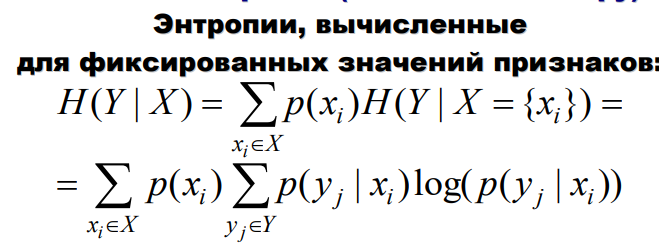

In [249]:
# условная энтропия таргета для разных id-шников
import numpy as np
from numpy import e, log

def pandas_entropy(df, column):
    eps = 1e-4
    cond_ent = 0
    for x in df[column].unique():
        # не учитывать редкие idшники 
        if sum(df[column]==x) < 3: continue
        labels = {0: 0, 1:0}
        count = 0
        ent = 0
        for row in df.loc[df[column]==x].iterrows():
            labels[row[1]['label']] += 1
            count += 1
        for key in labels.keys():
            ent += labels[key]/count * log(labels[key]/count + eps)
        cond_ent += sum(df[column]==x) / len(df[column].unique()) * ent
    return -cond_ent

print(
    "id1:", pandas_entropy(dataframe, 'id1'),
    "\nid2:",pandas_entropy(dataframe, 'id2'), 
    "\nid3:",pandas_entropy(dataframe, 'id3'),
)

id1: 0.0034768024670629193 
id2: 0.005096460189366422 
id3: 1.0974496472264141


### **id1**

In [250]:
pd.DataFrame.from_records([(col, dataframe[dataframe['id1']==col].shape[0]) for col in dataframe['id1'].unique()],
                          columns=['ID', 'Количество записей']).sort_values(by=['Количество записей'])

,ID,Количество записей
0,7596126584852021591,1
2022,2930104278371077583,1
2023,17686494180008315097,1
2024,11882194132230965287,1
2025,13431730663592526129,1
...,...,...
1943,10451371394900058742,4
2017,17339009923019316480,5
643,10346926462856798093,5
142,16101709345180713264,7


In [252]:
dataframe.loc[dataframe["id1"]==5002269436549863957].sort_values('id3')

,id1,id2,id3,text,f1,f2,f3,f4,f5,f6,f7,f8,label
2554,5002269436549863957,570408289656093317,147494687329013625,Очень качественно сшит. Нет изъянов. Хороший р...,40,2,5.0,9,16,4.555556,13,43,1
818,5002269436549863957,7793738754320529137,815378434367114826,Сумка сыну понравилась! Качество хорошее. Брак...,40,2,5.0,2,2,5.000000,13,43,1
41,5002269436549863957,8537018422111626685,2452047199270097551,"Сзади шнуровка , внутри мех и внешне выглядит ...",40,2,5.0,4,6,4.500000,13,43,1
75,5002269436549863957,13669343433924914553,2452047199270097551,"Мне подошли размер в размер. Бежевые ,смотрятс...",40,2,5.0,6,9,3.666667,13,43,1
79,5002269436549863957,11253309069675330304,2452047199270097551,Мне подошли размер в размер. Легко надела . Уд...,40,2,5.0,8,9,4.250000,13,43,1
145,5002269436549863957,12540256564528009708,2452047199270097551,Хороши на холодную слякотную погоду. Смотрятся...,40,2,5.0,4,5,4.250000,13,43,0
233,5002269436549863957,4707051732118680101,2452047199270097551,Вот такие классные ботиночки из натуральной за...,40,2,5.0,8,6,4.875000,13,43,1
542,5002269436549863957,2918697925375352353,2452047199270097551,"Меня привлекло ,то как сделана подошва, можно ...",40,2,5.0,19,17,4.368421,13,43,0
1062,5002269436549863957,8779533373574352561,2452047199270097551,"Хорошие ботинки,удобные,смотрятся брутально. Н...",40,2,5.0,16,14,4.875000,13,43,1
2557,5002269436549863957,6787750779881154682,2452047199270097551,Подошли по размеру и по всем моим желаниям. Вн...,40,2,5.0,15,13,4.733333,13,43,1


Вывод: в текстах говорится то о сумках, то об обуви, так что это вряд ли id товара. Также одному id1 соответствует несколько id3, причем с повторениями. 

### **id2**

In [253]:
pd.DataFrame.from_records([(col, dataframe[dataframe['id2']==col].shape[0]) for col in dataframe['id2'].unique()],
                          columns=['ID', 'Количество записей']).sort_values(by=['Количество записей'])

,ID,Количество записей
0,173777575861152844,1
1996,13639868030027494944,1
1997,14097710540886757342,1
1998,7804123429366340180,1
1999,8679295710902664873,1
...,...,...
1005,17948753558116765421,6
37,2191062068342455122,7
621,4898860250646538996,8
409,17312677487485542503,9


In [254]:
dataframe.loc[(dataframe["id2"].isin((4898860250646538996, 17312677487485542503, 13254340482863153572)))]

,id1,id2,id3,text,f1,f2,f3,f4,f5,f6,f7,f8,label
412,17075449667599358053,17312677487485542503,4418384912070712745,"Пришел быстро, качество очень хорошее спину де...",2,2,5.0,1493,992,4.470194,0,2,1
413,13917070513124260850,17312677487485542503,4418384912070712745,"Мне корректор понравился, он удобный, нравится...",2,2,5.0,1493,992,4.470194,0,2,1
611,14622051958413549965,13254340482863153572,10651534060335482528,Считаю что очень даже неплохо похудела,2,2,5.0,4435,1196,4.273506,0,2,1
612,5916690027460375815,13254340482863153572,10651534060335482528,"Первый опыт применения подобного средства,резу...",2,2,5.0,4435,1196,4.273506,0,2,0
628,2359005379567528572,4898860250646538996,1389057832302693481,"Кольцеваний лампа, классная. На пункте выдаче ...",8,7,5.0,755,721,5.000000,18,21,1
629,3636311668400598026,4898860250646538996,1389057832302693481,Крепко и уверено держится на штативе. Легко кр...,8,8,5.0,755,721,5.000000,20,20,1
630,9039781066462643713,4898860250646538996,1389057832302693481,Шикарная лампа❤️‍🔥 очень понравилось ☺️✨ реком...,8,7,5.0,755,721,5.000000,23,25,1
631,8665199094178811826,4898860250646538996,1389057832302693481,"Яркая хорошая лампа, жалко не сгибается кольцо...",8,8,5.0,755,721,5.000000,16,19,1
829,16593897152942024104,13254340482863153572,10651534060335482528,"Похудела на 1.7 кг за две недели. Кроме того,...",2,2,5.0,4435,1196,4.273506,0,2,1
924,2066063992304799920,17312677487485542503,4418384912070712745,"Корректор очень хорошо держит спину, негде не ...",2,2,5.0,1493,992,4.470194,1,3,1


Заметим, что каждому значению id2 соответствует одно единственное значение id3. Также каждому значению id2 соответствует единственное значение f6. Кроме того, для каждого значения id2 соответствуют (по большей части) более-менее одинаковые значения f1, f2, f4, f5, f7, f8. Если допустить, что данные собирались не единовременно, это можно объяснить тем, что это могут быть данные о цене, количестве покупок, количестве отзывов, которые со временем меняются. Не понятно только, почему f6 не меняется  

In [255]:
# проверка теории "каждому id2 соответствует один единственный id3"
pd.DataFrame.from_records([(col, dataframe[dataframe['id2']==col]['id3'].unique().shape[0]) for col in dataframe['id2'].unique()],
                          columns=['ID', 'Количество записей']).sort_values(by=['Количество записей'])

,ID,Количество записей
0,173777575861152844,1
1998,7804123429366340180,1
1999,8679295710902664873,1
2000,758599308772485018,1
2001,15817615627291693970,1
...,...,...
1005,17948753558116765421,1
1006,5800331877449623543,1
1007,11498929275631514017,1
998,2642467206901957758,1


In [112]:
# проверка теории "каждому id3 соответствует один единственный id2"
pd.DataFrame.from_records([(col, dataframe[dataframe['id3']==col]['id2'].unique().shape[0]) for col in dataframe['id3'].unique()],
                          columns=['ID', 'Количество записей']).sort_values(by=['Количество записей'])

,ID,Количество записей
977,11716132433518331197,1
428,13648582818292040317,1
427,17947806044802697671,1
426,1577909736229109622,1
425,6492871769515832171,1
...,...,...
6,12155125135782450682,35
58,8160404367092487937,37
158,16351792195234876872,41
38,16573173798776858338,46


In [256]:
# проверка теории "каждому id2 соответствует один единственный f6"
pd.DataFrame.from_records([(col, dataframe[dataframe['id2']==col]['f6'].unique().shape[0]) for col in dataframe['id2'].unique()],
                          columns=['ID', 'Количество записей']).sort_values(by=['Количество записей'])

,ID,Количество записей
0,173777575861152844,1
1998,7804123429366340180,1
1999,8679295710902664873,1
2000,758599308772485018,1
2001,15817615627291693970,1
...,...,...
1005,17948753558116765421,1
1006,5800331877449623543,1
1007,11498929275631514017,1
998,2642467206901957758,1


Вывод: каждому id2 соответствует один единственный id3 (но обратное утверждение неверно). Также каждому id2 соответствует одно единственное значение f6.Возможно, id2 – это товар, f6 - оценка товара 

### **id3**

In [257]:
pd.DataFrame.from_records([(col, dataframe[dataframe['id3']==col].shape[0]) for col in dataframe['id3'].unique()],
                          columns=['ID', 'Количество записей']).sort_values(by=['Количество записей'])                 

,ID,Количество записей
977,11716132433518331197,1
741,3526673073031317413,1
742,11386778458617633797,1
419,9663597746307213102,1
418,6068873150864942285,1
...,...,...
58,8160404367092487937,38
6,12155125135782450682,39
38,16573173798776858338,48
158,16351792195234876872,52


In [110]:
dataframe.loc[dataframe["id3"]==16738165381834614119]

,id1,id2,id3,text,f1,f2,f3,f4,f5,f6,f7,f8,label
24,8942589570771274688,16065831684866237607,16738165381834614119,В одном комплекте 3ситочки за всё 147платили,3,3,4.666667,36,10,4.722222,5,7,0
90,12429004205435075961,12244688105647578967,16738165381834614119,Стоит задуматься над упаковкой данного товара ...,6,6,3.666667,458,52,4.467249,43,81,0
148,17797268242851426115,3391102015759203896,16738165381834614119,Пощупал пластик на ручке и сразу сделал возвра...,1,1,1.000000,21,3,4.000000,1,5,1
240,11813192209493746179,2577488059237533079,16738165381834614119,Заказ не тот ! В место одного стекла пришли 5 ...,2,2,3.000000,1,0,1.000000,2,5,1
276,7863994555616117608,13686108839353402870,16738165381834614119,Качество гадость,2,2,1.000000,1,0,1.000000,12,20,1
294,14373724198964659403,12228216729946673135,16738165381834614119,"Часы хорошие, циферблат крупный, но есть один ...",13,13,4.615385,23,1,4.565217,24,32,0
832,18221724153734804870,8381040870672773717,16738165381834614119,"Не доставили, отказ и возврат средств.",1,1,1.000000,6,5,1.833333,0,1,0
1247,12642758456690786913,5124316197471314950,16738165381834614119,"Очень хороший чехол,но не угадала размером. Пр...",7,6,3.285714,6,5,5.000000,21,90,0
1452,6264389658680065244,13630683415904941325,16738165381834614119,Ваш сайт работал некоректно. Я не мог оплатить...,1,1,1.000000,152,17,4.651316,2,6,0
2046,9915835594764361352,14958915409357519016,16738165381834614119,"Показывает ток потребления, напряжение ак, бат...",1,1,5.000000,33,6,4.727273,1,3,0


id2 – id товара

id1 – id пользователя?

f3 – оценка в отзыве

f6 – оценка товара

## Перебалансировка

Добавим в датасет копии 

In [23]:
balanced_dataset = merged_dataset.append(merged_dataset[merged_dataset['label']==1]).append(merged_dataset[merged_dataset['label']==1])
balanced_dataset

C:\Users\Никита\AppData\Local\Temp\ipykernel_34696\91075958.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_dataset = merged_dataset.append(merged_dataset[merged_dataset['label']==1]).append(merged_dataset[merged_dataset['label']==1])
C:\Users\Никита\AppData\Local\Temp\ipykernel_34696\91075958.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_dataset = merged_dataset.append(merged_dataset[merged_dataset['label']==1]).append(merged_dataset[merged_dataset['label']==1])


,id1,id2,id3,text,f1,f3,f5,f6,f7,f8,label,text_len,words_count,sentence_count,number_percentage,caps_percentage,is_empty
0,7596126584852021591,173777575861152844,18254136755182295358,"Хотела купить на замену старых,по итогу эти у...",1,1.000000,13,4.272727,18,36,0,96,16,2,0.000000,0.062500,0
1,5327406586753254371,14366783259208998381,2324030737335224220,Запах по сравнению с обычным DOVE никакой. Оно...,10,2.700000,4,4.434783,90,109,1,99,15,3,0.000000,0.266667,0
2,2636757786779776109,16985421652518589249,4904562693381133981,"Кабель подошёл, хорошо работает.",4,4.000000,0,4.500000,4,6,0,32,5,2,0.000000,0.200000,0
3,15432976385014516263,2629180387521298831,13541353053200353836,"Восторг! Очень приятный аромат, держится долго...",6,5.000000,30,4.772727,14,15,1,81,11,3,0.000000,0.181818,0
4,11933982800034911890,14531191561111600318,9121890650636487522,Визуально все хорошо. Не пробовали. Купили в п...,19,5.000000,4,5.000000,26,33,0,52,8,3,0.000000,0.375000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,10046391362549256584,5450176251775713626,10827990466499151646,Очень вместительный. Брала за 580р. Все работа...,64,4.718750,23,4.666667,82,118,1,146,23,5,0.086957,0.173913,0
3094,3715826300767353883,14248822305452868164,8223254633971568382,"Классный чехол , сел как родной…",90,5.000000,0,5.000000,93,100,1,32,5,1,0.000000,0.200000,0
3100,5377145369530032933,13815619659284711422,6836784353719029392,довольна покупкой!👍🏻 советую,23,4.826087,40,4.638655,43,65,1,28,3,2,0.000000,0.000000,0
3105,16508910773142536176,4810020474718200925,6836784353719029392,"На айфон 13 стекло оказалось мало, как в ширин...",3,3.666667,103,4.672131,30,33,1,126,21,2,0.142857,0.095238,0


In [24]:
print(
    '1:', sum(balanced_dataset['label']==1),
    '\n0:', sum(balanced_dataset['label']==0)
)

1: 2475 
0: 2297


## Логистическая регрессия c L1

Попробуем при помощи логистической регрессии с L1 найти наиболее значимые параметры

In [25]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import normalize

In [32]:
X = balanced_dataset.drop(['id1', 'id2', 'id3', 'text', 'label'], axis=1)
Y = balanced_dataset['label']

X = X.fillna(0)

X = normalize(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, shuffle=True)

In [27]:
model = LogisticRegressionCV(solver='saga', penalty='l1', max_iter=10000)

model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.6267679413305396

In [28]:
model.coef_[0]

array([  1.21432206,  -2.99654288,  -1.13186268,  -1.17789629,
        -5.17207485,   0.33195796,  -2.7260289 ,   8.17882457,
        16.45454323,   1.5806031 ,  -8.70066907, 106.56551766])

# Baseline

<h1> Первый уровень </h1>

Уже сделано

<center>
    <img src="Lvl1.png" width=800>
</center>

Недостатки:
1. id-шники не используются или используются неэффективно
2. Никак не используется информация в тексте
----

<h1> Второй уровень </h1> 

Добавлена обработка id-шников
<center>
    <img src="Lvl2.png" width=800>
</center>
Алгоритм обработки id-шников
<center>
    <img src="Id2.png" height=500>
</center>
Результатом будет вектор из четырех чисел:

    {
        Вероятность класса 0 по id1
        Вероятность класса 1 по id1
        Вероятность класса 0 по id2
        Вероятность класса 1 по id2
    }

Недостатки:
1. Все еще не используется информация в тексте
----

<h1> Третий уровень </h1>

Добавлена векторизация текста
<center>
<img src="Lvl3.png" width=800 align="middle">
</center>
Алгоритм векторизации текста
<center>
<img src="NLP1.png" height=500 align="middle">
</center>

Недостатки:
1. В базе более 5000 уникальных слов, и вектора будут иметь соответствующую длину, что может сказаться на скорость обучения.
2. Векторизация представляет собой сбор информации о содержании тех или иных слов в тексте, но не смысл, который эти слова несут


Статьи:
1. Идея использовать векторизацию: https://habr.com/ru/companies/otus/articles/687796/
2. Идея извлечения общих фич из текста (количество слов, количество предложений...),  https://kessiezhang.medium.com/how-to-detect-fake-online-reviews-using-machine-learning-561aebf5dcdd
3. Руководство по лемматизации: https://python-school.ru/blog/russian-text-preprocessing/
4. Идея для решения проблемы несбалансированности классов: https://alexanderdyakonov.wordpress.com/2021/05/27/imbalance/

# Простые алгоритмы

## CatBoost

In [33]:
from catboost import CatBoostClassifier

In [44]:
X = balanced_dataset.drop(['label', 'text'], axis=1)
Y = balanced_dataset['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8)

In [45]:
model = CatBoostClassifier(cat_features = ['id1', 'id2', 'id3', 'is_empty'])
model.fit(X_train, Y_train, verbose=0)
model.score(X_test, Y_test)

0.7228915662650602

In [36]:
model.feature_importances_

array([16.29700796, 32.16996412,  5.34104644, 18.54604838,  1.94306262,
        4.88958358,  3.65587333,  3.7242657 ,  4.7203696 ,  3.5190124 ,
        1.61003342,  0.71326371,  1.15770514,  0.54652714,  1.16623644,
        0.        ])

In [37]:
Y_test[:20], model.predict(X_test[:20])

(1964    1
 1540    1
 1243    0
 2547    0
 2246    1
 455     0
 1345    0
 468     0
 2763    1
 793     1
 2115    1
 65      1
 426     0
 1006    1
 466     1
 78      1
 319     0
 735     1
 2446    1
 1488    0
 Name: label, dtype: int64,
 array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0],
       dtype=int64))

## Случайный лес

In [46]:
from sklearn.ensemble import RandomForestClassifier

Без индексов

In [47]:
X = balanced_dataset.drop(['id1', 'id2', 'id3', 'text', 'label'], axis=1)
Y = balanced_dataset['label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8)

model = RandomForestClassifier()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.7008905185961236

## Многослойный персептрон

In [48]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [68]:
X = dataframe.drop(['id1', 'id2', 'id3', 'text', 'label'], axis=1)
Y = dataframe['label']

for col in X.columns:
    X[col] /= max(X[col])-min(X[col])

X_train, X_test, Y_train, Y_test = train_test_split(X.to_numpy(), Y.to_numpy(), test_size=0.8)

In [69]:
params = {
    'hidden_layer_sizes':[(16,)*i for i in range(5, 11)],
    'learning_rate': ('adaptive', 'constant')
}

In [70]:
model_mlp = MLPClassifier(learning_rate='adaptive', early_stopping=True, random_state=0)

clf = GridSearchCV(model_mlp, params)

clf.fit(X_train, Y_train)

GridSearchCV(estimator=MLPClassifier(early_stopping=True,
                                     learning_rate='adaptive', random_state=0),
             param_grid={'hidden_layer_sizes': [(16, 16, 16, 16, 16),
                                                (16, 16, 16, 16, 16, 16),
                                                (16, 16, 16, 16, 16, 16, 16),
                                                (16, 16, 16, 16, 16, 16, 16,
                                                 16),
                                                (16, 16, 16, 16, 16, 16, 16, 16,
                                                 16),
                                                (16, 16, 16, 16, 16, 16, 16, 16,
                                                 16, 16)],
                         'learning_rate': ('adaptive', 'constant')})

In [74]:
clf.best_score_

0.7179483870967742

In [75]:
clf.best_estimator_

MLPClassifier(early_stopping=True, hidden_layer_sizes=(16, 16, 16, 16, 16, 16),
              learning_rate='adaptive', random_state=0)

In [76]:
clf.score(X_test, Y_test)

0.7429943955164131

Вывод: все простые модели справляются примерно одинаково, однако лучшим оказался catboost, обученный вместе с idшниками

## Байес

In [98]:
from sklearn.naive_bayes import MultinomialNB

In [101]:
X = balanced_dataset['text']
Y = balanced_dataset['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8)

In [102]:
model = MultinomialNB()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

ValueError: could not convert string to float: 'Отличная сорочка. Удобная, приятная к телу.'